# Задание

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re # регулярные выражения
import plotly.graph_objects as go
import plotly.express as px



In [2]:
data = pd.read_csv('../datasets/kaggle_survey_2022_responses.csv', low_memory=False)
name2question = data.iloc[0] 
data.drop(0, inplace=True) # удаляем первую строку, содержащую тексты вопросов

## Задание 1

Используя библиотеку matplotlib, построй круговую диаграмму (Pie plot) для возраста респондента.

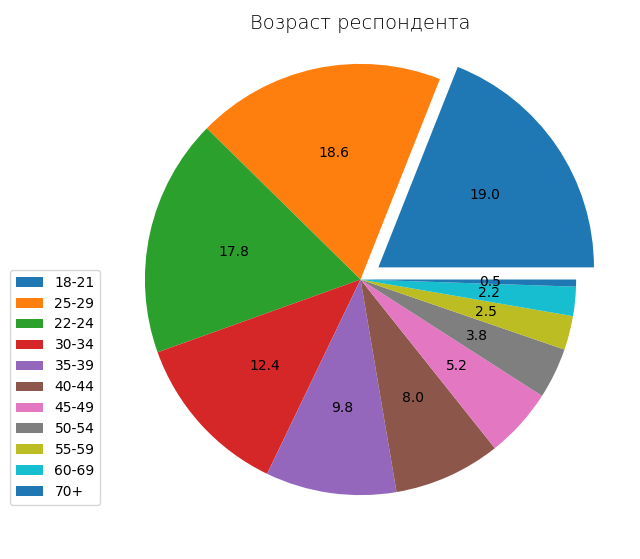

In [3]:
# Код тут



age = data['Q2'].value_counts() # сортируем по вохрастанию количество возрастов респондентов каждого промежутка

agelist = list(age.index) # 

qua = list(age.values)

explode_value = [0.1] + [0.0] * (len(qua)-1)
fig, ax = plt.subplots(figsize = (10, 7)) # размер
wedges, texts, autotexts = ax.pie(qua,
                                 # pctdistance = 0.8, # положение меток на секторах
                                 autopct = '%.1f', # сколько знаков после запятой выводить на меткахб 1 - число с плавающей запятой и одним знаком после запятой, f - floating-point format
                                 explode = explode_value, #доля радиуса, на которую смещается каждый сектор относительно центра
                                )
ax.legend(wedges, agelist,
          loc = 'center right',
          bbox_to_anchor = (0.03, 0.3)) #для более точного расположения (значения от 0 до 1) - доля от размеров координатных осей
plt.setp(autotexts, size = 'medium') # изменения, применимые к элементам на графике (размер шрифта)
ax.set_title(label = "Возраст респондента", fontdict={'fontsize': 14, 'fontweight': 5} , y = 0.95)
plt.show()
          
                                 
                    


## Задание 2

Используя библиотеку seaborn, построй столбцовую диаграмму (Bar plot) по популярности библиотек для визуализации. \
Отсортируй библиотеки по уменьшению популярности. Используй цветовую палитру 'colorblind'.

<function matplotlib.pyplot.show(close=None, block=None)>

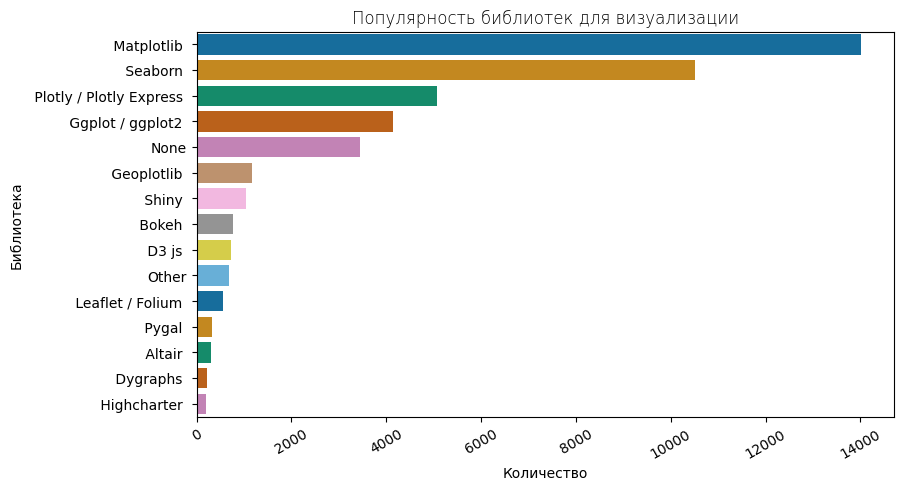

In [4]:
# Код тут

plt.subplots(figsize = (9,5))



Q15 = [col_name for col_name in data.columns if 'Q15_' in col_name] # собираем все, что начианется с Q15_

libs = data[Q15].melt() # собираем все Q15 в одну колонку

lib_count = libs['value'].value_counts()


sns.barplot(x=lib_count.values, y = lib_count.index, palette = 'colorblind')
plt.title('Популярность библиотек для визуализации', fontdict = {'fontsize': 12, 'fontweight': 10})
plt.ylabel('Библиотека')
plt.xlabel('Количество')
plt.xticks(rotation = 30)
plt.show


## Задание 3

Используя библиотеку seaborn, построй диаграмму "Ящик с усами" (Box plot) заработка по различным специальностям. \
Отсортируй специальности по убыванию медианы заработка. Используй цветовую палитру 'colorblind'

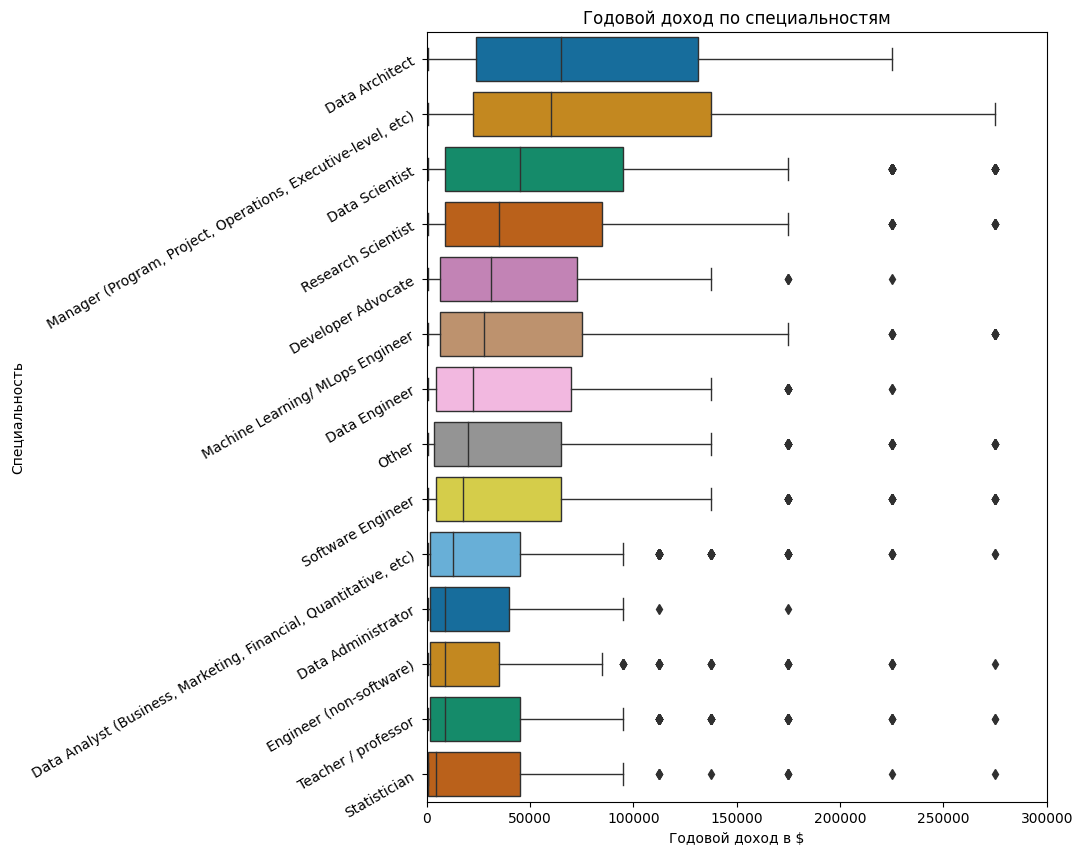

In [5]:
# Код тут

plt.rcdefaults() # стандартные стили
plt.subplots(figsize=(8,10)) # размер поля графика



# создаем словарь с промежуточными значениями зп в качестве ключей и их средним значением в качестве значений словаря
sal_value = data['Q29'].value_counts().index

sal_value_avg = [re.sub(r'[^0-9-]', '', var).split('-') for var in sal_value] # удаление нечисловых символов и разделение по тире 

sal_value_avg = [round((int(val[0]) + int(val[1])) / len(val)) if len(val) > 1 else int(val[0]) for val in sal_value_avg]  # подсчет среднего
   
sal_mapping = dict(zip(list(sal_value), sal_value_avg)) # создаем словарь с отрезвом и ео средним значением


data['Q29_new'] = data['Q29'].map(sal_mapping)
result = data[['Q23', 'Q29_new']].dropna()
order = result.groupby('Q23')['Q29_new'].median().sort_values(ascending=False).index # группировка по специальности и расчет медианного значения

box_plot = sns.boxplot(y='Q23', x = 'Q29_new', data = result, palette = 'colorblind', order=order, linewidth=1) # ссылочная переменная на график для дальнейшей работы с ней
box_plot.set_xlabel('Годовой доход в $')
box_plot.set_ylabel('Специальность')
box_plot.set_title('Годовой доход по специальностям')
box_plot.set(xlim=(0, 300000))
box_plot.tick_params(axis='y', labelrotation=30)
plt.show()
# Точки за пределами отрезвов на графиках - выбросы


## Задание 4
Используя модуль graph_objects из библиотеки plotly, построй столбцовую диаграмму (Bar plot) на распределение респондентов по возрасту по специальностям Data Administrator, Data Analyst, Data Engineer, Data Scientist, Engineer, MLops Engineer, 
Research Scientist, Software Engineer, Data Architect. \
Цвета в этом задании не важны

In [6]:
# Код тут

from plotly.subplots import make_subplots # возможность создать несколько графиков в одной фигуре



spec = ['Data Administrator', 'Data Analyst', 'Data Engineer', 'Data Scientist', 'Engineer', 'MLops Engineer', 'Research Scientist', 'Software Engineer', 'Data Architect']


data['Q23'] = data['Q23'].str.replace( r' \(.*?\)|^.*?\/ ','', regex = True) # убираем лишние символы и уточнения

filter_Q23 = data['Q23'].isin(spec) # оставляем только специальности из списка по заданию
data = data[filter_Q23] # теперь тут данные только с нужными специальностями
result = data[['Q23','Q2']].dropna()

count = result.groupby(['Q23','Q2'])['Q2'].count()


fig = make_subplots(
    rows = 3, cols = 3,
    subplot_titles = [f'<b><i>{i}</i></b>' for i in spec],  # b - жирный, i - курсив и html верстки
    vertical_spacing=0.17,  # Увеличение метса между графиками
    row_heights=[2, 2, 2])  # высота графиков каждой строки
                    
for i in range(3): # идем по строкам
    for j in range (3): # идем по столбцам
        speciality_name = spec[i*3+j]  
        fig.add_trace(go.Bar(x = count[speciality_name].index.to_list(), y = list(count[speciality_name]), name=speciality_name), row=i+1, col=j+1)
                    
fig.update_layout(title_text='<i>Распределение возрастов по специальностям</i>', title_font_size = 17.2, width = 900, height = 600)
fig.show()

## Задание 5

Используя библиотеку plotly, построй карту стран респондентов. В этом вам поможет [plotly.choropleth](https://plotly.com/python/choropleth-maps/). \
В аргументах функции укажи параметр color_continuous_scale="Viridis".

In [7]:
# Код тут


res_data = data['Q4'].value_counts() # количество респондентов из разных стран
fig = px.choropleth(res_data, locationmode='country names', locations = res_data.index, #
                   hover_name=res_data.index,
                   color = res_data.values, # по каким данным идет цветовое наполнение карты
                   range_color=[0,1000],
                   color_continuous_scale='Viridis',
                   labels={'color': 'Количество респондентов'})
fig.update_layout(
    title_text='Карта мира',
    coloraxis_colorbar=dict(ticks='outside', ticklen=8, tickwidth=1.5, outlinewidth=0), # промежуточные значения и палочки к ним в цветовой легенда
    title_x=0.5,
    width = 800,
    height = 600)
                    
fig.show()
    

## Задание 6 - Дополнительное

Одна из самых красивых и динамичных визуализаций - это [Bar Chart Race](https://pypi.org/project/bar-chart-race/). 
Выбери данные, которые интересно было бы визуализировать с помощью этой библиотеки, и поделись с ним со своими одногруппниками. \
Загрузи итоговую визуализацию на гит в формате .gif.